In [1]:
# Analyse von Dominion Spielen, graphisch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

In [2]:
df = pd.read_csv("results_cum.csv", encoding="utf-8")
df

,Name,Zug,Karte,Anzahl
0,DORT,0,Kupfer,7
1,DORT,0,Anwesen,3
2,DORT,1,Gladiator,1
3,DORT,2,Dorf,1
4,DORT,3,Thronsaal,1
...,...,...,...,...
248,O,30,Kolonie,3
249,O,30,Reichtum,1
250,O,30,Schwarzmarkt,2
251,O,30,Provinz,2


In [3]:
players = df['Name'].unique()

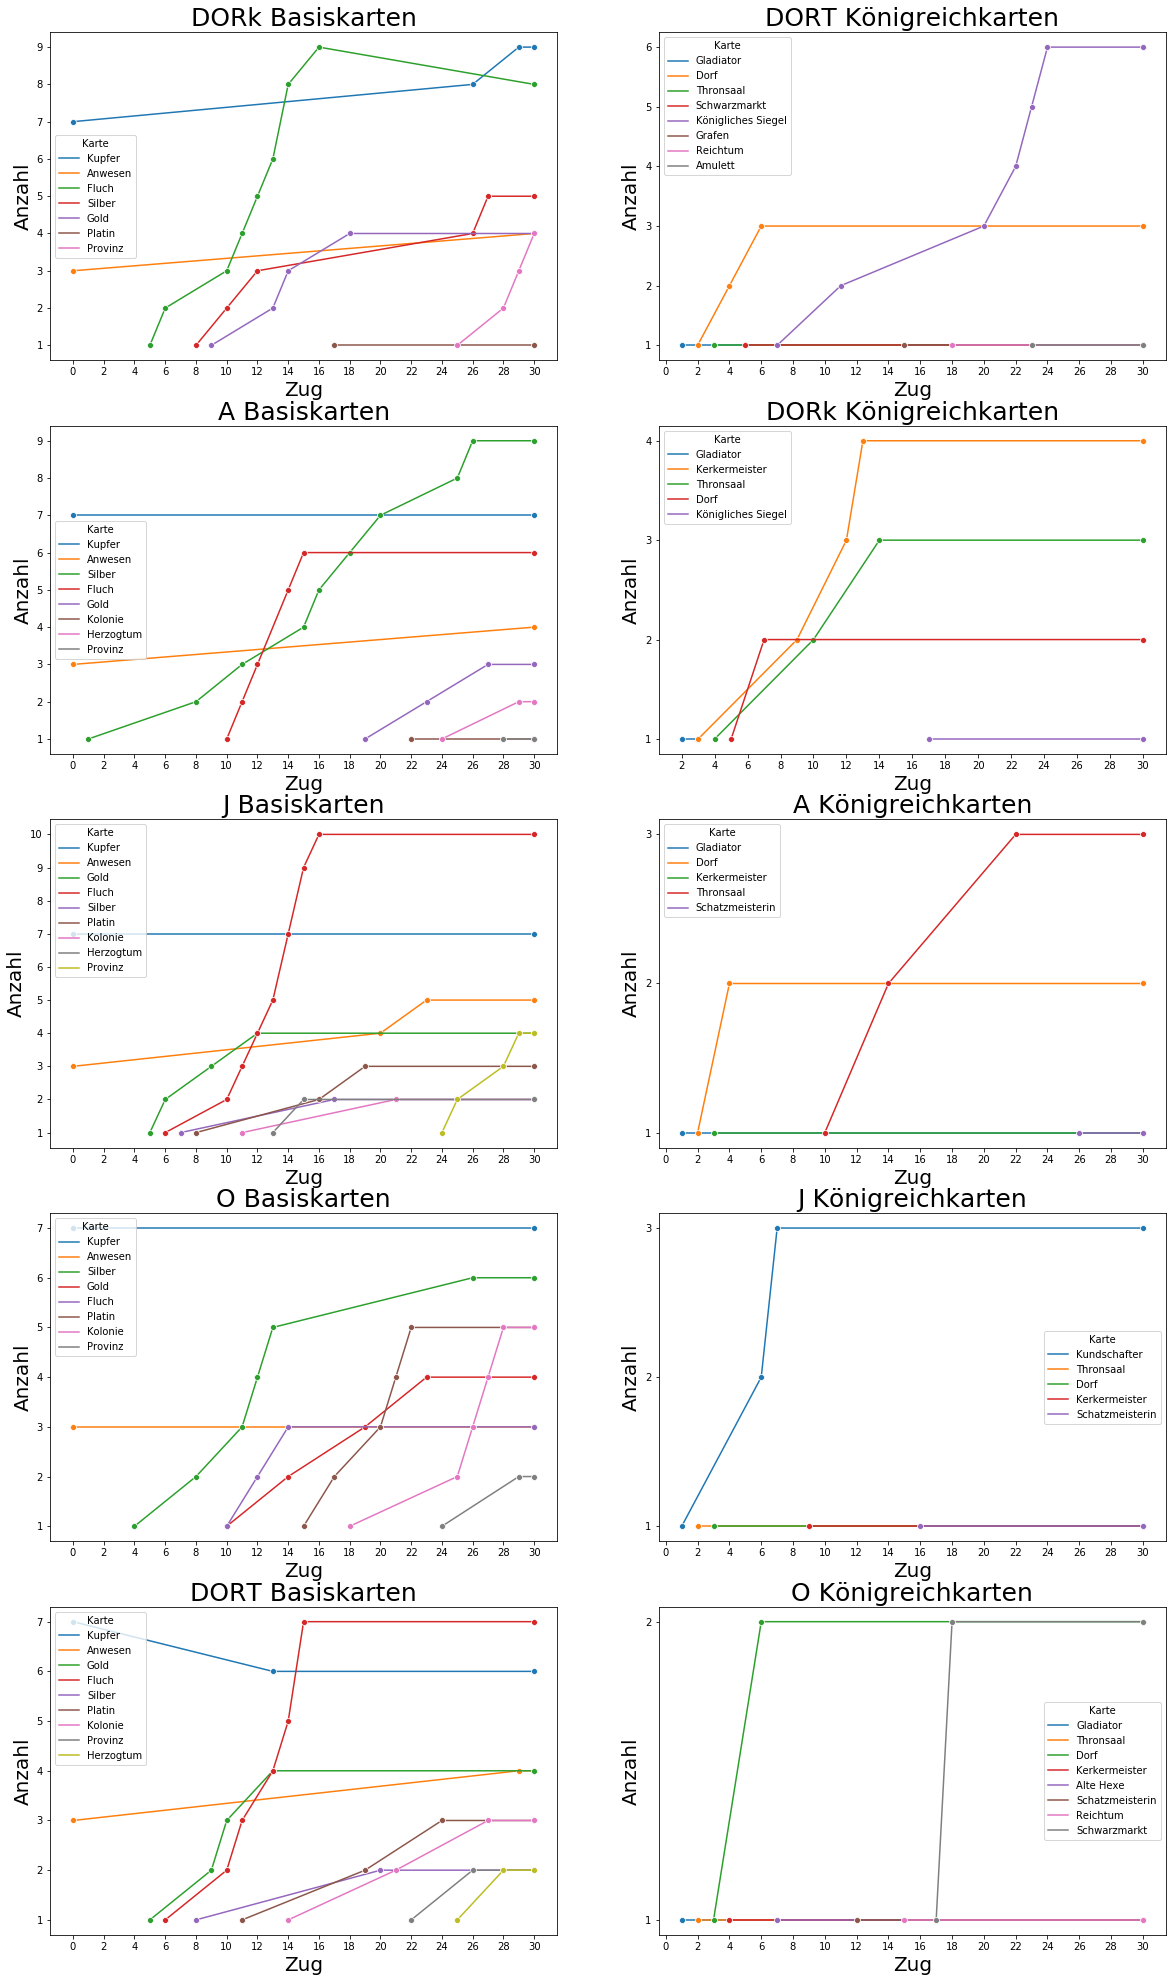

In [4]:
fig, axes = plt.subplots(len(players), 2, figsize=(20, 7*len(players)))
cnt = 0

for player in players:
    per_player_old = df.query("Name==@player")
    per_player_basis = per_player_old.query("Karte in ['Kupfer', 'Silber', 'Gold', 'Platin', 'Anwesen', 'Herzogtum', 'Provinz', 'Kolonie', 'Fluch']")
    per_player_kr = per_player_old.query("Karte not in ['Kupfer', 'Silber', 'Gold', 'Platin', 'Anwesen', 'Herzogtum', 'Provinz', 'Kolonie', 'Fluch']")

    g=sns.lineplot(x='Zug',
                y='Anzahl',
                hue='Karte',
                data=per_player_basis,
                marker="o",
                ax=axes[cnt, 0])

    g.set_xlabel("Zug",fontsize=20)
    g.set_ylabel("Anzahl",fontsize=20)
    
    axes[cnt-1, 0].yaxis.set_major_locator(MaxNLocator(integer=True))
    axes[cnt-1, 0].set_title(player+" Basiskarten", fontsize=25)
    axes[cnt-1, 0].xaxis.set_major_locator(ticker.MultipleLocator(2))
    
    g=sns.lineplot(x='Zug',
                y='Anzahl',
                hue='Karte',
                data=per_player_kr,
                marker="o",
                ax=axes[cnt, 1])
    
    cnt += 1
    g.set_xlabel("Zug",fontsize=20)
    g.set_ylabel("Anzahl",fontsize=20)
    # g.set(ylim=(1, None))
    
    axes[cnt-1, 1].yaxis.set_major_locator(MaxNLocator(integer=True))
    axes[cnt-1, 1].set_title(player+" Königreichkarten", fontsize=25)
    axes[cnt-1, 1].xaxis.set_major_locator(ticker.MultipleLocator(2))
fig.savefig('results.svg')